<a href="https://colab.research.google.com/github/Anusarakh/Anusarakh/blob/main/FINALL_17_MARCH_24_MODEL_ML_VERSION_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 1️⃣ เชื่อม google drive

In [1]:
#เชื่อม google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
#เข้าไป path ใน google drive
import os
os.chdir('/content/gdrive/MyDrive/Thesis/song/')

!pwd #เช็ค paht ที่กำลังทำงานอยู่

/content/gdrive/MyDrive/Thesis/song


 2️⃣ Data preparation by FV

In [3]:
import librosa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import csv
import scipy.io.wavfile as wav

In [4]:
classes_0 = 0 #เพลงแนะนำ
classes_1 = 1 #เพลงไม่แนะนำ

path_0 = '/content/gdrive/MyDrive/Thesis/song/Normallcase/fortherapyfinall/'
path_1 = '/content/gdrive/MyDrive/Thesis/song/Normallcase/nontherapyfinall/'



In [ ]:
# tempo = librosa.feature.tempo(y=x, sr=44100 , hop_length=256)
# df_tempo = pd.DataFrame(tempo)

In [ ]:
# tempo[0]

In [5]:
x_list = os.listdir(path_0)
mfcc_mean_0 = []
mfcc_var_0 = []
spec_cen_mean_0 = []
spec_cen_var_0 = []
spec_band_mean_0 = []
spec_band_var_0 = []
zcr_mean_0 = []
zcr_var_0 = []
tempo = []
classes_0_ = []
tempo_0 = []
for i in x_list:
  x , sr = librosa.load(path_0+i, sr=44100)
  #สกัด MFCC
  mfcc = librosa.feature.mfcc(y=x, sr=44100 ,n_mfcc= 20, n_fft = 512,  hop_length=256 )
  df_mfcc = pd.DataFrame(mfcc)
  mfcc_mean = df_mfcc.mean(axis = 1) #หาค่าเฉลี่ยในแต่ละลำดับข้อมูล MFCC
  #mfcc_var= df_mfcc.var(axis = 1) #หาค่าความแปรปรวนในแต่ละลำดับข้อมูล MFCC
  #สกัด spectral_centroid
  spec_cen = librosa.feature.spectral_centroid(y=x, sr=44100, S=None, n_fft=512, hop_length=256)
  df_spec_cen = pd.DataFrame(spec_cen)
  spec_cen_mean = df_spec_cen.mean(axis = 1) #หาค่าเฉลี่ยในแต่ละลำดับข้อมูล spectral_centroid
  #spec_cen_var= df_spec_cen.var(axis = 1) #หาค่าความแปรปรวนในแต่ละลำดับข้อมูล spectral_centroid
  #สกัด spectral_bandwidth
  spec_band = librosa.feature.spectral_bandwidth(y=x, sr=44100, S=None, n_fft=512, hop_length=256)
  df_spec_band = pd.DataFrame(spec_band)
  spec_band_mean = df_spec_band.mean(axis = 1) #หาค่าเฉลี่ยในแต่ละลำดับข้อมูล spectral_bandwidth
  #spec_band_var= df_spec_band.var(axis = 1) #หาค่าความแปรปรวนในแต่ละลำดับข้อมูล spectral_bandwidth
  #สกัด zero_crossing_rate
  zcr = librosa.feature.zero_crossing_rate(y=x, frame_length=512, hop_length=256)
  df_zcr = pd.DataFrame(zcr)
  zcr_mean = df_zcr.mean(axis = 1) #หาค่าเฉลี่ยในแต่ละลำดับข้อมูล zero_crossing_rate
  #zcr_var= df_zcr.var(axis = 1) #หาค่าความแปรปรวนในแต่ละลำดับข้อมูล zero_crossing_rate
  #สกัด tempo
  tempo = librosa.feature.tempo(y=x, sr=44100 , hop_length=256)

  mfcc_mean_0.append(list(mfcc_mean))
  #mfcc_var_0.append(list(mfcc_var))
  spec_cen_mean_0.append(spec_cen_mean[0])
  #spec_cen_var_0.append(spec_cen_var[0])
  spec_band_mean_0.append(spec_band_mean[0])
  #spec_band_var_0.append(spec_band_var[0])
  zcr_mean_0.append(zcr_mean[0])
  #zcr_var_0.append(zcr_var[0])
  tempo_0.append(tempo[0])

  classes_0_.append(path_0+i)

/usr/local/lib/python3.10/dist-packages/librosa/feature/spectral.py:2143: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  mel_basis = filters.mel(sr=sr, n_fft=n_fft, **kwargs)
/usr/local/lib/python3.10/dist-packages/librosa/feature/spectral.py:2143: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  mel_basis = filters.mel(sr=sr, n_fft=n_fft, **kwargs)
/usr/local/lib/python3.10/dist-packages/librosa/feature/spectral.py:2143: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  mel_basis = filters.mel(sr=sr, n_fft=n_fft, **kwargs)
/usr/local/lib/python3.10/dist-packages/librosa/feature/spectral.py:2143: UserWarning: Empty filters de

In [6]:
x_list = os.listdir(path_1)
mfcc_mean_1 = []
#mfcc_var_1 = []
spec_cen_mean_1 = []
#spec_cen_var_1 = []
spec_band_mean_1 = []
#spec_band_var_1 = []
zcr_mean_1 = []
#zcr_var_1 = []
tempo = []
classes_1_ = []
tempo_1 = []
for i in x_list:
  x , sr = librosa.load(path_1+i, sr=44100)
  #สกัด MFCC
  mfcc = librosa.feature.mfcc(y=x, sr=44100 ,n_mfcc= 20, n_fft = 512,  hop_length=256 )
  df_mfcc = pd.DataFrame(mfcc)
  mfcc_mean = df_mfcc.mean(axis = 1) #หาค่าเฉลี่ยในแต่ละลำดับข้อมูล MFCC
  #mfcc_var= df_mfcc.var(axis = 1) #หาค่าความแปรปรวนในแต่ละลำดับข้อมูล MFCC
  #สกัด spectral_centroid
  spec_cen = librosa.feature.spectral_centroid(y=x, sr=44100, S=None, n_fft=512, hop_length=256)
  df_spec_cen = pd.DataFrame(spec_cen)
  spec_cen_mean = df_spec_cen.mean(axis = 1) #หาค่าเฉลี่ยในแต่ละลำดับข้อมูล spectral_centroid
  #spec_cen_var= df_spec_cen.var(axis = 1) #หาค่าความแปรปรวนในแต่ละลำดับข้อมูล spectral_centroid
  #สกัด spectral_bandwidth
  spec_band = librosa.feature.spectral_bandwidth(y=x, sr=44100, S=None, n_fft=512, hop_length=256)
  df_spec_band = pd.DataFrame(spec_band)
  spec_band_mean = df_spec_band.mean(axis = 1) #หาค่าเฉลี่ยในแต่ละลำดับข้อมูล spectral_bandwidth
  #spec_band_var= df_spec_band.var(axis = 1) #หาค่าความแปรปรวนในแต่ละลำดับข้อมูล spectral_bandwidth
  #สกัด zero_crossing_rate
  zcr = librosa.feature.zero_crossing_rate(y=x, frame_length=512, hop_length=256)
  df_zcr = pd.DataFrame(zcr)
  zcr_mean = df_zcr.mean(axis = 1) #หาค่าเฉลี่ยในแต่ละลำดับข้อมูล zero_crossing_rate
  #zcr_var= df_zcr.var(axis = 1) #หาค่าความแปรปรวนในแต่ละลำดับข้อมูล zero_crossing_rate
  #สกัด tempo
  tempo = librosa.feature.tempo(y=x, sr=44100, hop_length=256)


  mfcc_mean_1.append(list(mfcc_mean))
  #mfcc_var_1.append(list(mfcc_var))
  spec_cen_mean_1.append(spec_cen_mean[0])
  #spec_cen_var_1.append(spec_cen_var[0])
  spec_band_mean_1.append(spec_band_mean[0])
  #spec_band_var_1.append(spec_band_var[0])
  zcr_mean_1.append(zcr_mean[0])
  #zcr_var_1.append(zcr_var[0])
  tempo_1.append(tempo[0])

  classes_1_.append(path_1+i)

/usr/local/lib/python3.10/dist-packages/librosa/feature/spectral.py:2143: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  mel_basis = filters.mel(sr=sr, n_fft=n_fft, **kwargs)
/usr/local/lib/python3.10/dist-packages/librosa/feature/spectral.py:2143: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  mel_basis = filters.mel(sr=sr, n_fft=n_fft, **kwargs)
/usr/local/lib/python3.10/dist-packages/librosa/feature/spectral.py:2143: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  mel_basis = filters.mel(sr=sr, n_fft=n_fft, **kwargs)
/usr/local/lib/python3.10/dist-packages/librosa/feature/spectral.py:2143: UserWarning: Empty filters de

In [9]:
mfcc_mean_0 = np.array(mfcc_mean_0)
mfcc_mean_1 = np.array(mfcc_mean_1)

mfcc_mean_df = pd.DataFrame(data = mfcc_mean_0)
mfcc_mean_df['spec'] = spec_cen_mean_0
mfcc_mean_df['specband'] = spec_band_mean_0
mfcc_mean_df['zero'] = zcr_mean_0
mfcc_mean_df['tempo'] = tempo_0
mfcc_mean_df['y'] = 0
mfcc_mean_df['path'] = classes_0_

mfcc_mean_df_1 = pd.DataFrame(data = mfcc_mean_1)
mfcc_mean_df_1['spec'] = spec_cen_mean_1
mfcc_mean_df_1['specband'] = spec_band_mean_1
mfcc_mean_df_1['zero'] = zcr_mean_1
mfcc_mean_df_1['tempo'] = tempo_1
mfcc_mean_df_1['y'] = 1
mfcc_mean_df_1['path'] = classes_1_

#df_mean = mfcc_mean_df.append(mfcc_mean_df_1)
df_mean = pd.concat([mfcc_mean_df, mfcc_mean_df_1], ignore_index=True)
print(df_mean.shape)
df_mean.head(10)



(82, 26)


,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,spec,specband,zero,tempo,y,path
0,-379.508820,67.611938,-62.423706,23.165838,-17.030453,33.050392,-18.436098,15.426235,-15.747377,3.422516,...,0.365399,-2.700605,4.046536,-3.121535,3388.793305,3738.388161,0.081786,124.529367,0,/content/gdrive/MyDrive/Thesis/song/Normallcas...
1,-354.847870,87.174637,-31.676809,11.795786,1.417269,23.362387,-12.640376,10.996572,-12.979670,-4.319019,...,-2.025934,-1.024250,4.028388,-4.888572,2310.175750,3085.561672,0.050950,121.599265,0,/content/gdrive/MyDrive/Thesis/song/Normallcas...
2,-242.735413,84.182892,-89.690170,33.847168,-10.871581,36.350422,-14.858019,12.861016,-17.039759,-3.613929,...,3.280125,-6.115852,3.467003,-0.075818,2829.275712,3050.874501,0.077162,107.666016,0,/content/gdrive/MyDrive/Thesis/song/Normallcas...
3,-392.375122,88.908119,-23.111881,28.746162,-3.523096,25.930311,-2.549639,4.360907,-8.801807,-5.679143,...,-2.242397,-1.934690,1.106406,-1.754013,1927.390737,2802.790943,0.037422,135.999178,0,/content/gdrive/MyDrive/Thesis/song/Normallcas...
4,-463.481934,124.672264,-41.370480,13.227163,-16.169813,28.671621,-10.807143,-1.309174,-7.763828,-11.823654,...,-3.239670,1.940748,1.754940,1.806270,1548.013281,2312.849218,0.036935,111.139113,0,/content/gdrive/MyDrive/Thesis/song/Normallcas...
5,-343.581726,94.486427,-31.478441,14.653499,-18.981001,29.790754,-13.614028,6.838835,-15.953328,-8.611911,...,-1.069414,-6.815122,4.428864,-1.874795,2375.826008,3245.419077,0.049871,120.185320,0,/content/gdrive/MyDrive/Thesis/song/Normallcas...
6,-441.980713,98.320969,-15.254008,10.448504,-0.486443,16.009645,-0.918669,-0.622890,-8.425668,-6.425031,...,-1.243144,-0.285627,0.439930,-1.304921,1850.818686,2605.948263,0.042154,139.674831,0,/content/gdrive/MyDrive/Thesis/song/Normallcas...
7,-323.662964,87.383209,-61.830666,24.932512,-15.292845,24.480413,-10.028382,5.463522,-11.521437,-5.600159,...,-1.501126,-5.430986,3.480926,-0.328661,2587.438966,3059.405675,0.063706,100.348908,0,/content/gdrive/MyDrive/Thesis/song/Normallcas...
8,-309.696899,115.219780,-68.027725,13.412593,3.426944,24.173647,0.300333,6.227666,-8.437672,-1.319487,...,-2.766700,-0.605393,6.168839,-1.725040,1629.563295,2304.295752,0.030047,112.347147,0,/content/gdrive/MyDrive/Thesis/song/Normallcas...
9,-314.465393,110.410782,-74.981293,29.986454,-7.338615,25.959728,-5.522851,0.679730,-9.638121,-9.150560,...,-4.541062,0.393568,1.435997,0.965714,2011.613624,2507.809421,0.047142,159.014423,0,/content/gdrive/MyDrive/Thesis/song/Normallcas...


In [10]:
df_mean.tail(10)

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,spec,specband,zero,tempo,y,path
72,-305.049744,105.443916,-46.023987,17.922361,-13.973338,23.583933,-15.183883,5.439202,-13.734568,-11.125467,...,-0.848754,-3.501495,1.987618,-2.141070,2073.836632,2832.354328,0.042033,96.597547,1,/content/gdrive/MyDrive/Thesis/song/Normallcas...
73,-330.014008,133.429001,-67.345901,21.647186,-2.152007,2.364386,20.960445,-10.590530,-10.994016,-11.202647,...,-4.986901,2.269165,-1.773830,-0.888920,1599.700974,1853.288288,0.043842,135.999178,1,/content/gdrive/MyDrive/Thesis/song/Normallcas...
74,-295.628265,108.638435,-94.394974,31.702612,-2.868654,17.153193,14.314636,-9.825918,3.667284,-8.990951,...,-10.178648,7.673312,-1.362193,1.566811,2183.633771,2335.900437,0.058714,94.825115,1,/content/gdrive/MyDrive/Thesis/song/Normallcas...
75,-300.291412,130.604736,-68.307617,23.563719,-7.600580,12.768711,7.989045,-16.300734,2.996273,-15.904163,...,-6.040193,1.216709,1.056514,0.484181,1807.438064,2114.936983,0.050056,137.812500,1,/content/gdrive/MyDrive/Thesis/song/Normallcas...
76,-373.006439,111.057243,-70.470245,23.104494,5.770144,8.667936,4.116431,-6.408481,3.312445,-14.945417,...,-4.285094,1.478788,1.478700,-1.521290,2004.096079,2137.953053,0.056959,113.581731,1,/content/gdrive/MyDrive/Thesis/song/Normallcas...
77,-369.939270,111.006889,-50.765091,19.344168,7.799756,8.579390,2.794703,-4.172796,-1.632059,-13.453838,...,-5.486093,1.292707,0.341496,-2.391444,1849.579794,2000.699746,0.054425,117.453835,1,/content/gdrive/MyDrive/Thesis/song/Normallcas...
78,-354.544403,131.261398,-68.792648,20.042942,17.843475,6.151685,2.534423,-5.968409,0.798008,-13.496183,...,-2.289442,5.074263,1.524038,-0.706515,1506.952605,1755.188346,0.039955,94.825115,1,/content/gdrive/MyDrive/Thesis/song/Normallcas...
79,-324.663086,141.828659,-91.230713,19.328415,17.492096,7.136199,7.416655,-11.893297,-4.742863,-12.132155,...,-7.481759,-0.235870,2.620291,0.369081,1628.027243,1776.481367,0.045716,132.512019,1,/content/gdrive/MyDrive/Thesis/song/Normallcas...
80,-340.177124,129.573669,-81.216537,9.419070,-1.111494,21.584787,9.245095,-13.721383,-3.195596,-11.927259,...,-8.643314,5.683794,-3.970731,-2.722594,1942.586908,2127.297477,0.058374,88.341346,1,/content/gdrive/MyDrive/Thesis/song/Normallcas...
81,-341.989288,111.170166,-72.593430,21.277153,-0.321768,6.175199,10.828424,-10.328005,-1.184132,-12.547610,...,-5.538836,1.119878,0.867411,-0.269676,2096.613205,2161.290512,0.067637,121.599265,1,/content/gdrive/MyDrive/Thesis/song/Normallcas...


In [11]:
df_mean

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,spec,specband,zero,tempo,y,path
0,-379.508820,67.611938,-62.423706,23.165838,-17.030453,33.050392,-18.436098,15.426235,-15.747377,3.422516,...,0.365399,-2.700605,4.046536,-3.121535,3388.793305,3738.388161,0.081786,124.529367,0,/content/gdrive/MyDrive/Thesis/song/Normallcas...
1,-354.847870,87.174637,-31.676809,11.795786,1.417269,23.362387,-12.640376,10.996572,-12.979670,-4.319019,...,-2.025934,-1.024250,4.028388,-4.888572,2310.175750,3085.561672,0.050950,121.599265,0,/content/gdrive/MyDrive/Thesis/song/Normallcas...
2,-242.735413,84.182892,-89.690170,33.847168,-10.871581,36.350422,-14.858019,12.861016,-17.039759,-3.613929,...,3.280125,-6.115852,3.467003,-0.075818,2829.275712,3050.874501,0.077162,107.666016,0,/content/gdrive/MyDrive/Thesis/song/Normallcas...
3,-392.375122,88.908119,-23.111881,28.746162,-3.523096,25.930311,-2.549639,4.360907,-8.801807,-5.679143,...,-2.242397,-1.934690,1.106406,-1.754013,1927.390737,2802.790943,0.037422,135.999178,0,/content/gdrive/MyDrive/Thesis/song/Normallcas...
4,-463.481934,124.672264,-41.370480,13.227163,-16.169813,28.671621,-10.807143,-1.309174,-7.763828,-11.823654,...,-3.239670,1.940748,1.754940,1.806270,1548.013281,2312.849218,0.036935,111.139113,0,/content/gdrive/MyDrive/Thesis/song/Normallcas...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,-369.939270,111.006889,-50.765091,19.344168,7.799756,8.579390,2.794703,-4.172796,-1.632059,-13.453838,...,-5.486093,1.292707,0.341496,-2.391444,1849.579794,2000.699746,0.054425,117.453835,1,/content/gdrive/MyDrive/Thesis/song/Normallcas...
78,-354.544403,131.261398,-68.792648,20.042942,17.843475,6.151685,2.534423,-5.968409,0.798008,-13.496183,...,-2.289442,5.074263,1.524038,-0.706515,1506.952605,1755.188346,0.039955,94.825115,1,/content/gdrive/MyDrive/Thesis/song/Normallcas...
79,-324.663086,141.828659,-91.230713,19.328415,17.492096,7.136199,7.416655,-11.893297,-4.742863,-12.132155,...,-7.481759,-0.235870,2.620291,0.369081,1628.027243,1776.481367,0.045716,132.512019,1,/content/gdrive/MyDrive/Thesis/song/Normallcas...
80,-340.177124,129.573669,-81.216537,9.419070,-1.111494,21.584787,9.245095,-13.721383,-3.195596,-11.927259,...,-8.643314,5.683794,-3.970731,-2.722594,1942.586908,2127.297477,0.058374,88.341346,1,/content/gdrive/MyDrive/Thesis/song/Normallcas...


In [12]:
import pandas as pd
df_mean.to_csv("./df_mean_02.csv")


## [เริ่มรัน] Split data train/teast by 80:20

In [13]:
import pandas as pd

df_mean = pd.read_csv('./df_mean_02.csv')
df_mean = df_mean.drop(columns=['Unnamed: 0'])

In [ ]:
# df_mean.head()

In [14]:
df_mean.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,spec,specband,zero,tempo,y,path
0,-379.508820,67.611938,-62.423706,23.165838,-17.030453,33.050392,-18.436098,15.426235,-15.747377,3.422516,...,0.365399,-2.700605,4.046536,-3.121535,3388.793305,3738.388161,0.081786,124.529367,0,/content/gdrive/MyDrive/Thesis/song/Normallcas...
1,-354.847870,87.174637,-31.676809,11.795786,1.417269,23.362387,-12.640376,10.996572,-12.979670,-4.319019,...,-2.025934,-1.024250,4.028388,-4.888572,2310.175750,3085.561672,0.050950,121.599265,0,/content/gdrive/MyDrive/Thesis/song/Normallcas...
2,-242.735413,84.182892,-89.690170,33.847168,-10.871581,36.350422,-14.858019,12.861016,-17.039759,-3.613929,...,3.280125,-6.115852,3.467003,-0.075818,2829.275712,3050.874501,0.077162,107.666016,0,/content/gdrive/MyDrive/Thesis/song/Normallcas...
3,-392.375122,88.908119,-23.111881,28.746162,-3.523096,25.930311,-2.549639,4.360907,-8.801807,-5.679143,...,-2.242397,-1.934690,1.106406,-1.754013,1927.390737,2802.790943,0.037422,135.999178,0,/content/gdrive/MyDrive/Thesis/song/Normallcas...
4,-463.481934,124.672264,-41.370480,13.227163,-16.169813,28.671621,-10.807143,-1.309174,-7.763828,-11.823654,...,-3.239670,1.940748,1.754940,1.806270,1548.013281,2312.849218,0.036935,111.139113,0,/content/gdrive/MyDrive/Thesis/song/Normallcas...


In [15]:
path = df_mean[df_mean['y']== 0]['path'].tolist()
# print(len(path))
from random import sample
res_samle_0 = sample(path,int(len(path)*0.8))
print(len(set(res_samle_0)))

path = df_mean[df_mean['y']== 1]['path'].tolist()
# print(len(path))
from random import sample
res_samle_1 = sample(path,int(len(path)*0.8))
print(len(set(res_samle_1)))

res_samle_0.extend(res_samle_1)

print(len(res_samle_0))

28
36
64


In [ ]:
#import pandas as pd

# Create a DataFrame
#df = pd.DataFrame({'A': [1, 2, 3], 'B': [4, 5, 6]})

# Create a new row to append
#new_row = pd.DataFrame({'A': [7], 'B': [8]})

# Append the new row to the DataFrame
#df = df.append(new_row, ignore_index=True)

#print(df)

In [16]:
train = df_mean[df_mean['path'].isin(res_samle_0)]
train['split'] = 'train'
test = df_mean[~df_mean['path'].isin(res_samle_0)]
test['split'] = 'test'



<ipython-input-16-f43c67b6e1bd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['split'] = 'train'
<ipython-input-16-f43c67b6e1bd>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['split'] = 'test'


In [17]:
train

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,spec,specband,zero,tempo,y,path,split
0,-379.508820,67.611938,-62.423706,23.165838,-17.030453,33.050392,-18.436098,15.426235,-15.747377,3.422516,...,-2.700605,4.046536,-3.121535,3388.793305,3738.388161,0.081786,124.529367,0,/content/gdrive/MyDrive/Thesis/song/Normallcas...,train
1,-354.847870,87.174637,-31.676809,11.795786,1.417269,23.362387,-12.640376,10.996572,-12.979670,-4.319019,...,-1.024250,4.028388,-4.888572,2310.175750,3085.561672,0.050950,121.599265,0,/content/gdrive/MyDrive/Thesis/song/Normallcas...,train
2,-242.735413,84.182892,-89.690170,33.847168,-10.871581,36.350422,-14.858019,12.861016,-17.039759,-3.613929,...,-6.115852,3.467003,-0.075818,2829.275712,3050.874501,0.077162,107.666016,0,/content/gdrive/MyDrive/Thesis/song/Normallcas...,train
5,-343.581726,94.486427,-31.478441,14.653499,-18.981001,29.790754,-13.614028,6.838835,-15.953328,-8.611911,...,-6.815122,4.428864,-1.874795,2375.826008,3245.419077,0.049871,120.185320,0,/content/gdrive/MyDrive/Thesis/song/Normallcas...,train
6,-441.980713,98.320969,-15.254008,10.448504,-0.486443,16.009645,-0.918669,-0.622890,-8.425668,-6.425031,...,-0.285627,0.439930,-1.304921,1850.818686,2605.948263,0.042154,139.674831,0,/content/gdrive/MyDrive/Thesis/song/Normallcas...,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,-373.006439,111.057243,-70.470245,23.104494,5.770144,8.667936,4.116431,-6.408481,3.312445,-14.945417,...,1.478788,1.478700,-1.521290,2004.096079,2137.953053,0.056959,113.581731,1,/content/gdrive/MyDrive/Thesis/song/Normallcas...,train
78,-354.544403,131.261398,-68.792648,20.042942,17.843475,6.151685,2.534423,-5.968409,0.798008,-13.496183,...,5.074263,1.524038,-0.706515,1506.952605,1755.188346,0.039955,94.825115,1,/content/gdrive/MyDrive/Thesis/song/Normallcas...,train
79,-324.663086,141.828659,-91.230713,19.328415,17.492096,7.136199,7.416655,-11.893297,-4.742863,-12.132155,...,-0.235870,2.620291,0.369081,1628.027243,1776.481367,0.045716,132.512019,1,/content/gdrive/MyDrive/Thesis/song/Normallcas...,train
80,-340.177124,129.573669,-81.216537,9.419070,-1.111494,21.584787,9.245095,-13.721383,-3.195596,-11.927259,...,5.683794,-3.970731,-2.722594,1942.586908,2127.297477,0.058374,88.341346,1,/content/gdrive/MyDrive/Thesis/song/Normallcas...,train


In [18]:
test

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,spec,specband,zero,tempo,y,path,split
3,-392.375122,88.908119,-23.111881,28.746162,-3.523096,25.930311,-2.549639,4.360907,-8.801807,-5.679143,...,-1.934690,1.106406,-1.754013,1927.390737,2802.790943,0.037422,135.999178,0,/content/gdrive/MyDrive/Thesis/song/Normallcas...,test
4,-463.481934,124.672264,-41.370480,13.227163,-16.169813,28.671621,-10.807143,-1.309174,-7.763828,-11.823654,...,1.940748,1.754940,1.806270,1548.013281,2312.849218,0.036935,111.139113,0,/content/gdrive/MyDrive/Thesis/song/Normallcas...,test
8,-309.696899,115.219780,-68.027725,13.412593,3.426944,24.173647,0.300333,6.227666,-8.437672,-1.319487,...,-0.605393,6.168839,-1.725040,1629.563295,2304.295752,0.030047,112.347147,0,/content/gdrive/MyDrive/Thesis/song/Normallcas...,test
21,-385.305664,145.067810,-56.022385,4.949201,-2.187338,20.143375,9.611876,-15.179281,-0.946769,-16.843750,...,-1.740863,4.622648,-0.471868,1207.218009,1649.887094,0.029539,130.834652,0,/content/gdrive/MyDrive/Thesis/song/Normallcas...,test
26,-288.216492,105.524872,-80.954460,35.056068,-9.645187,24.266403,-1.170631,0.237670,-3.746842,-21.461937,...,3.361222,-3.762616,6.075917,2232.286376,2528.889547,0.060158,132.512019,0,/content/gdrive/MyDrive/Thesis/song/Normallcas...,test
32,-384.387390,134.208038,-29.640192,4.725503,-4.368307,17.613705,-1.561975,1.901349,-3.922769,-9.933795,...,-0.822321,1.527907,1.326932,1308.449741,1955.854229,0.028832,96.597547,0,/content/gdrive/MyDrive/Thesis/song/Normallcas...,test
33,-356.805817,88.995461,-62.817177,31.440334,-12.102778,29.732784,-19.807737,8.079276,-14.807262,-6.834243,...,-4.426508,5.318573,-1.229694,2621.347845,3176.336810,0.063347,164.062500,0,/content/gdrive/MyDrive/Thesis/song/Normallcas...,test
34,-361.276428,108.790802,-32.125134,17.413742,5.462484,21.277958,-4.656857,-1.397332,-8.667356,-4.831971,...,-2.575969,3.353624,-0.669726,1580.504718,2394.734163,0.031104,154.267724,0,/content/gdrive/MyDrive/Thesis/song/Normallcas...,test
43,-329.166809,120.010025,-65.102112,15.183566,-11.102986,28.729210,-7.596907,1.045329,-1.888594,-19.360622,...,0.145319,0.632703,-2.270287,1929.652167,2311.806003,0.051301,147.656250,1,/content/gdrive/MyDrive/Thesis/song/Normallcas...,test
45,-316.402527,95.546120,-56.068439,22.433027,-7.039864,27.494719,-13.440655,13.815747,-13.789297,-6.118659,...,-4.313414,3.341599,-1.385850,2190.738103,2905.127025,0.047760,111.139113,1,/content/gdrive/MyDrive/Thesis/song/Normallcas...,test


In [19]:

df_all = pd.concat([train, test], ignore_index=True)

print(df_all.shape)
df_all.head()

(82, 27)


,0,1,2,3,4,5,6,7,8,9,...,17,18,19,spec,specband,zero,tempo,y,path,split
0,-379.508820,67.611938,-62.423706,23.165838,-17.030453,33.050392,-18.436098,15.426235,-15.747377,3.422516,...,-2.700605,4.046536,-3.121535,3388.793305,3738.388161,0.081786,124.529367,0,/content/gdrive/MyDrive/Thesis/song/Normallcas...,train
1,-354.847870,87.174637,-31.676809,11.795786,1.417269,23.362387,-12.640376,10.996572,-12.979670,-4.319019,...,-1.024250,4.028388,-4.888572,2310.175750,3085.561672,0.050950,121.599265,0,/content/gdrive/MyDrive/Thesis/song/Normallcas...,train
2,-242.735413,84.182892,-89.690170,33.847168,-10.871581,36.350422,-14.858019,12.861016,-17.039759,-3.613929,...,-6.115852,3.467003,-0.075818,2829.275712,3050.874501,0.077162,107.666016,0,/content/gdrive/MyDrive/Thesis/song/Normallcas...,train
3,-343.581726,94.486427,-31.478441,14.653499,-18.981001,29.790754,-13.614028,6.838835,-15.953328,-8.611911,...,-6.815122,4.428864,-1.874795,2375.826008,3245.419077,0.049871,120.185320,0,/content/gdrive/MyDrive/Thesis/song/Normallcas...,train
4,-441.980713,98.320969,-15.254008,10.448504,-0.486443,16.009645,-0.918669,-0.622890,-8.425668,-6.425031,...,-0.285627,0.439930,-1.304921,1850.818686,2605.948263,0.042154,139.674831,0,/content/gdrive/MyDrive/Thesis/song/Normallcas...,train


##TEST OVERFIT


In [20]:
pip install scikit-learn

###random forest

Training Accuracy: 1.00
Test Accuracy: 0.72


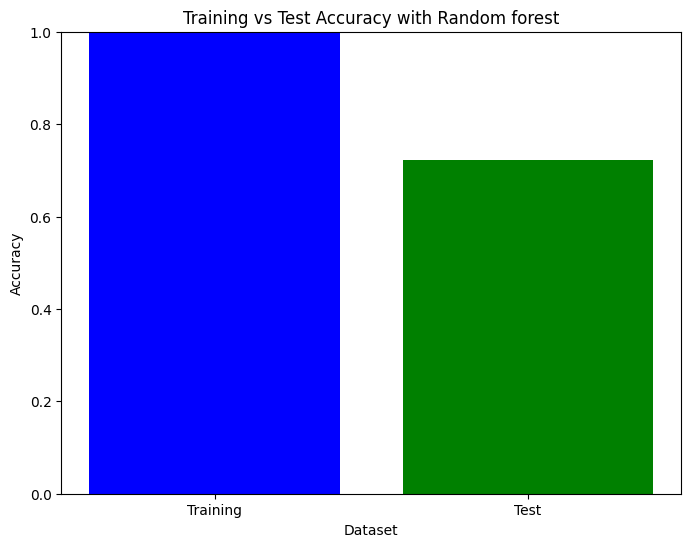

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

train = df_all[df_all['split'] =='train']
test = df_all[df_all['split'] !='train']
X_train = train.iloc[:, 0:24].to_numpy()
X_test = test.iloc[:, 0:24].to_numpy()
y_train = train.iloc[:, -3]
y_test = test.iloc[:, -3]
# Generate a synthetic dataset
#X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_classes=2, random_state=42)

# Split the data into training and test sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest classifier
modelRF = RandomForestClassifier(n_estimators=100, random_state=1)
modelRF_= modelRF.fit(X_train, y_train)

# Evaluate the model on training and test data
train_acc_RF = accuracy_score(y_train, modelRF_.predict(X_train))
test_acc_RF = accuracy_score(y_test, modelRF_.predict(X_test))

print(f"Training Accuracy: {train_acc_RF:.2f}")
print(f"Test Accuracy: {test_acc_RF:.2f}")

# Plotting the training and test accuracies
plt.figure(figsize=(8, 6))
plt.bar(['Training', 'Test'], [train_acc_RF, test_acc_RF], color=['blue', 'green'])
plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.title('Training vs Test Accuracy with Random forest')
plt.ylim(0, 1)
plt.show()

###SVM

Training Accuracy: 1.00
Test Accuracy: 0.56


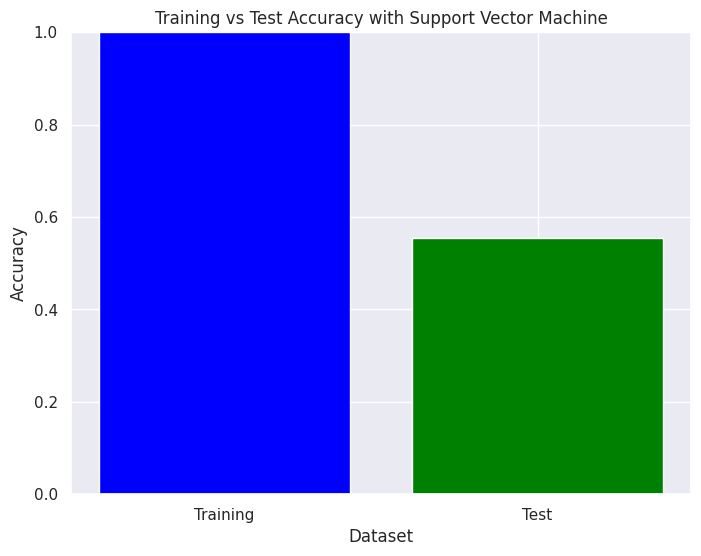

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


train = df_all[df_all['split'] =='train']
test = df_all[df_all['split'] !='train']
X_train = train.iloc[:, 0:24].to_numpy()
X_test = test.iloc[:, 0:24].to_numpy()
y_train = train.iloc[:, -3]
y_test = test.iloc[:, -3]

# Generate a synthetic dataset
#X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_classes=2, random_state=42)

# Split the data into training and test sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Support Vector Machine (SVM) classifier
modelSVM = SVC(kernel='rbf', gamma = 0.001)
modelSVM_ = modelSVM.fit(X_train, y_train)

# Evaluate the model on training and test data
train_acc_SVM = accuracy_score(y_train, modelSVM_.predict(X_train))
test_acc_SVM = accuracy_score(y_test, modelSVM_.predict(X_test))

print(f"Training Accuracy: {train_acc_SVM:.2f}")
print(f"Test Accuracy: {test_acc_SVM:.2f}")

# Plotting the training and test accuracies
plt.figure(figsize=(8, 6))
plt.bar(['Training', 'Test'], [train_acc_SVM, test_acc_SVM], color=['blue', 'green'])
plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.title('Training vs Test Accuracy with Support Vector Machine')
plt.ylim(0, 1)
plt.show()

###ANN

Training Accuracy: 0.44
Test Accuracy: 0.50


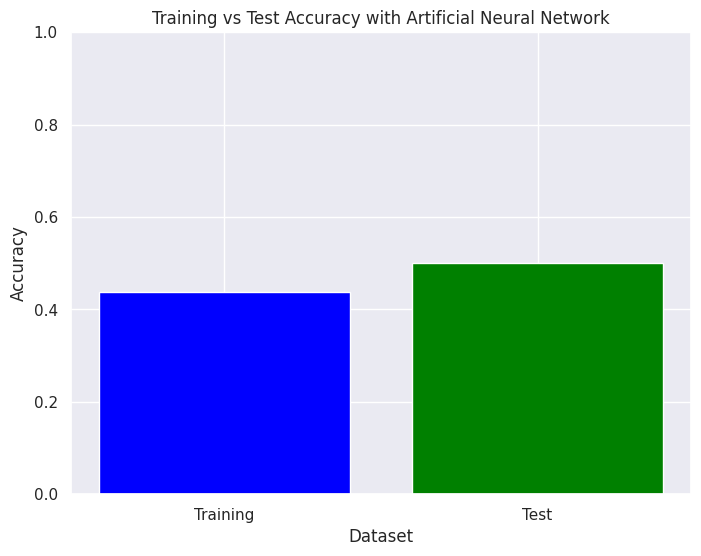

In [29]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import tensorflow.keras as keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import *
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV


# Generate a synthetic dataset
#X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_classes=2, random_state=42)

# Split the data into training and test sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (optional but recommended for neural networks)
#scaler = StandardScaler()
#X_train_scaled = scaler.fit_transform(X_train)
#X_test_scaled = scaler.transform(X_test)



modelANN = MLPClassifier(random_state=1, solver = 'sgd', alpha = 1e-4, hidden_layer_sizes = 100)
modelANN_ = modelANN.fit(X_train, y_train)
# Build the ANN model

# Evaluate the model on test data


# Evaluate the model on training and test data
train_acc_ANN = accuracy_score(y_train, modelANN_.predict(X_train))
test_acc_ANN = accuracy_score(y_test, modelANN_.predict(X_test))

#y_pred_ANN_ = (modelANN_.predict(X_test)).astype(int)
#test_accuracy_ANN = accuracy_score(y_test, y_pred_ANN_)

print(f"Training Accuracy: {train_acc_ANN:.2f}")
print(f"Test Accuracy: {test_acc_ANN:.2f}")
# Plotting the training and test accuracies
plt.figure(figsize=(8, 6))
plt.bar(['Training', 'Test'], [train_acc_ANN, test_acc_ANN], color=['blue', 'green'])
plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.title('Training vs Test Accuracy with Artificial Neural Network')
plt.ylim(0, 1)
plt.show()

###KNN

Training Accuracy: 1.00
Test Accuracy: 0.67


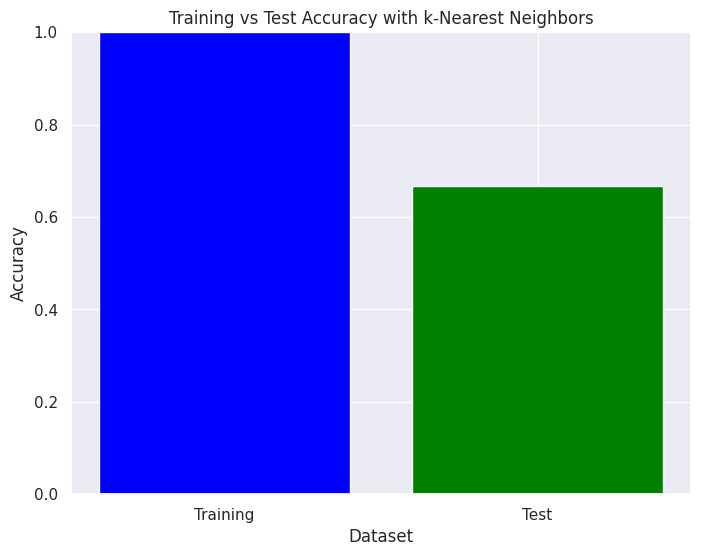

In [30]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


n_neighbors = [3, 5, 7, 9]
weights = ['uniform', 'distance']  # Corrected parameter name

knn = KNeighborsClassifier()
param_gridknn = {
    'n_neighbors': n_neighbors,
    'weights': weights  # Corrected parameter name
}

modelknn_ = KNeighborsClassifier(n_neighbors= 3, weights='distance')  # Corrected parameter name
modelknn_A = modelknn_.fit(X_train, y_train)

# Evaluate the model on training and test data
train_acc_kNN = accuracy_score(y_train, modelknn_A.predict(X_train))
test_acc_kNN = accuracy_score(y_test, modelknn_A.predict(X_test))


print(f"Training Accuracy: {train_acc_kNN:.2f}")
print(f"Test Accuracy: {test_acc_kNN:.2f}")
# Plotting the training and test accuracies
plt.figure(figsize=(8, 6))
plt.bar(['Training', 'Test'], [train_acc_kNN, test_acc_kNN], color=['blue', 'green'])
plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.title('Training vs Test Accuracy with k-Nearest Neighbors')
plt.ylim(0, 1)
plt.show()

# 3️⃣ ML// Random Forest Classifier

In [22]:

import os
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

## Mean fv

1.4.1	criterion กำหนด ‘entropy’ และ ‘gini’

1.4.2	n_estimators กำหนด 100, 200, 400, และ 500

1.4.3	maxdepth กำหนด 5, 10, 15, 20, 25 และ 30


In [23]:
train = df_all[df_all['split'] =='train']
test = df_all[df_all['split'] !='train']
X_train = train.iloc[:, 0:24].to_numpy()
X_test = test.iloc[:, 0:24].to_numpy()
y_train = train.iloc[:, -3]
y_test = test.iloc[:, -3]

n_estimators = [100, 200, 400, 500]
max_depth = [5, 10, 15, 20, 25, 30]
criterion = ['entropy', 'gini']
#min_samples_split = [2, 5, 10, 15, 100]
forest = RandomForestClassifier(random_state = 1)
hyperF ={'n_estimators' : n_estimators, 'max_depth' : max_depth, 'criterion' : criterion} #, 'min_samples_split' : min_samples_split}
gridF = GridSearchCV(forest, hyperF, cv = 10, verbose = 1, n_jobs = -1)
bestF = gridF.fit(X_train, y_train)
bestF_ = bestF.best_params_

forestOpt = RandomForestClassifier(random_state = 1, max_depth = bestF_['max_depth'], n_estimators = bestF_['n_estimators'], criterion = bestF_['criterion']) #, min_samples_split =bestF_['min_samples_split'])
modelOpt = forestOpt.fit(X_train, y_train)

print(bestF_)

Fitting 10 folds for each of 48 candidates, totalling 480 fits
{'criterion': 'gini', 'max_depth': 10, 'n_estimators': 100}


In [24]:
# view the results as a pandas DataFrame
import pandas as pd
pd.DataFrame(bestF.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

,mean_test_score,std_test_score,params
0,0.561905,0.177601,"{'criterion': 'entropy', 'max_depth': 5, 'n_es..."
1,0.595238,0.189581,"{'criterion': 'entropy', 'max_depth': 5, 'n_es..."
2,0.578571,0.223112,"{'criterion': 'entropy', 'max_depth': 5, 'n_es..."
3,0.609524,0.202926,"{'criterion': 'entropy', 'max_depth': 5, 'n_es..."
4,0.609524,0.181703,"{'criterion': 'entropy', 'max_depth': 10, 'n_e..."
5,0.564286,0.221838,"{'criterion': 'entropy', 'max_depth': 10, 'n_e..."
6,0.609524,0.188742,"{'criterion': 'entropy', 'max_depth': 10, 'n_e..."
7,0.609524,0.188742,"{'criterion': 'entropy', 'max_depth': 10, 'n_e..."
8,0.609524,0.181703,"{'criterion': 'entropy', 'max_depth': 15, 'n_e..."
9,0.564286,0.221838,"{'criterion': 'entropy', 'max_depth': 15, 'n_e..."


In [25]:
y_pred = modelOpt.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.75      0.71         8
           1       0.78      0.70      0.74        10

    accuracy                           0.72        18
   macro avg       0.72      0.72      0.72        18
weighted avg       0.73      0.72      0.72        18

[[6 2]
 [3 7]]


(array([0.5, 1.5]), [Text(0.5, 0, 'therapy'), Text(1.5, 0, 'non-therapy')])

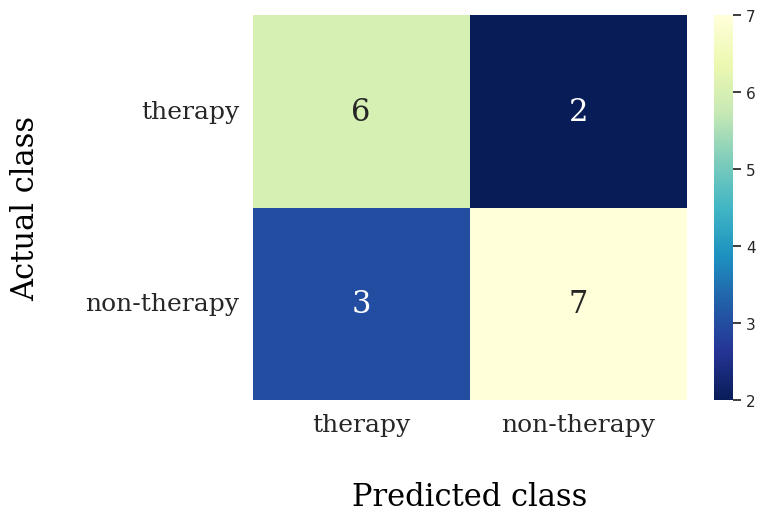

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

cm = np.array(confusion_matrix(y_test, y_pred))

font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal'}
# cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.set()
classes = np.array(['therapy','non-therapy'])
fig, ax = plt.subplots(figsize=(7, 5))
ax = sns.heatmap(cm, annot=True, fmt='.0f', cmap="YlGnBu_r", annot_kws={'family': 'serif', "size": 22}) #Blues,Oranges,Reds,YlGnBu
ax.set(xticklabels=classes, yticklabels=classes)
plt.setp(ax.get_yticklabels(), rotation=0, ha="right")
# ax.set_title(f'Confusion matrix of XGboost model',fontsize=32, fontdict=font, pad=25)
ax.set_ylabel('Actual class',fontsize=22, fontdict=font, labelpad=32)
ax.set_xlabel('Predicted class',fontsize=22, fontdict=font, labelpad=32)

hfont = {'fontname':'serif'}
plt.yticks(fontsize=18, **hfont)
plt.xticks(fontsize=18, **hfont)

## Mean fv- Normalization

In [31]:
train = df_all[df_all['split'] =='train']
test = df_all[df_all['split'] !='train']
X_train = train.iloc[:, 0:24].to_numpy()
X_test = test.iloc[:, 0:24].to_numpy()
y_train = train.iloc[:, -3]
y_test = test.iloc[:, -3]

X_train_norm = np.linalg.norm(X_train)
X_train_norm = X_train/X_train_norm

X_test_norm = np.linalg.norm(X_test)
X_test_norm = X_test/X_test_norm


n_estimators = [100, 200, 400, 500]
max_depth = [5, 10, 15, 20, 25, 30]
criterion = ['entropy', 'gini']
#min_samples_split = [2, 5, 10, 15, 100]
forest = RandomForestClassifier(random_state = 1)
hyperF ={'n_estimators' : n_estimators, 'max_depth' : max_depth, 'criterion' : criterion} #, 'min_samples_split' : min_samples_split}
gridF = GridSearchCV(forest, hyperF, cv = 10, verbose = 1, n_jobs = -1)
bestF = gridF.fit(X_train_norm, y_train)
bestF_ = bestF.best_params_

forestOpt = RandomForestClassifier(random_state = 1, max_depth = bestF_['max_depth'], n_estimators = bestF_['n_estimators'], criterion = bestF_['criterion']) #, min_samples_split =bestF_['min_samples_split'])
modelOpt = forestOpt.fit(X_train_norm, y_train)

print(bestF_)

Fitting 10 folds for each of 48 candidates, totalling 480 fits
{'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 100}


In [32]:
# view the results as a pandas DataFrame
import pandas as pd
pd.DataFrame(bestF.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

,mean_test_score,std_test_score,params
0,0.578571,0.174655,"{'criterion': 'entropy', 'max_depth': 5, 'n_es..."
1,0.595238,0.189581,"{'criterion': 'entropy', 'max_depth': 5, 'n_es..."
2,0.578571,0.223112,"{'criterion': 'entropy', 'max_depth': 5, 'n_es..."
3,0.578571,0.223112,"{'criterion': 'entropy', 'max_depth': 5, 'n_es..."
4,0.626190,0.185668,"{'criterion': 'entropy', 'max_depth': 10, 'n_e..."
5,0.578571,0.181968,"{'criterion': 'entropy', 'max_depth': 10, 'n_e..."
6,0.626190,0.170051,"{'criterion': 'entropy', 'max_depth': 10, 'n_e..."
7,0.609524,0.188742,"{'criterion': 'entropy', 'max_depth': 10, 'n_e..."
8,0.626190,0.185668,"{'criterion': 'entropy', 'max_depth': 15, 'n_e..."
9,0.578571,0.181968,"{'criterion': 'entropy', 'max_depth': 15, 'n_e..."


In [33]:
y_pred = modelOpt.predict(X_test_norm)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.44      1.00      0.62         8
           1       0.00      0.00      0.00        10

    accuracy                           0.44        18
   macro avg       0.22      0.50      0.31        18
weighted avg       0.20      0.44      0.27        18

[[ 8  0]
 [10  0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(array([0.5, 1.5]), [Text(0.5, 0, 'therapy'), Text(1.5, 0, 'non-therapy')])

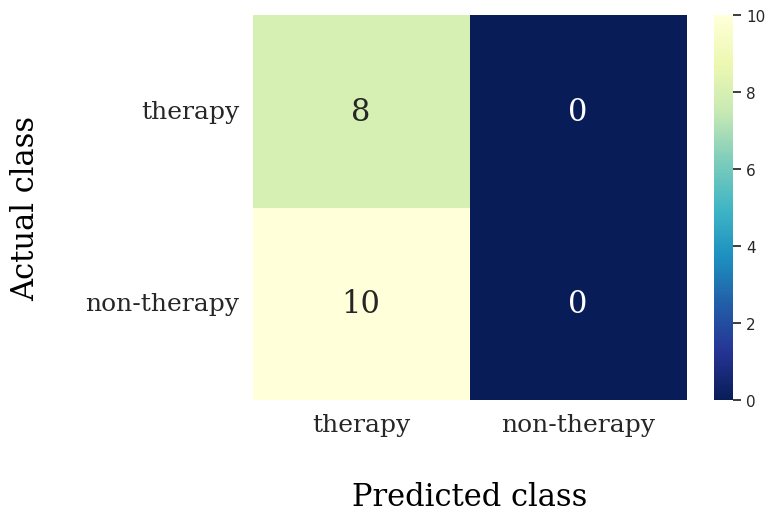

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

cm = np.array(confusion_matrix(y_test, y_pred))

font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal'}
# cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.set()
classes = np.array(['therapy','non-therapy'])
fig, ax = plt.subplots(figsize=(7, 5))
ax = sns.heatmap(cm, annot=True, fmt='.0f', cmap="YlGnBu_r", annot_kws={'family': 'serif', "size": 22}) #Blues,Oranges,Reds,YlGnBu
ax.set(xticklabels=classes, yticklabels=classes)
plt.setp(ax.get_yticklabels(), rotation=0, ha="right")
# ax.set_title(f'Confusion matrix of XGboost model',fontsize=32, fontdict=font, pad=25)
ax.set_ylabel('Actual class',fontsize=22, fontdict=font, labelpad=32)
ax.set_xlabel('Predicted class',fontsize=22, fontdict=font, labelpad=32)

hfont = {'fontname':'serif'}
plt.yticks(fontsize=18, **hfont)
plt.xticks(fontsize=18, **hfont)

# 4️⃣ ML // SVM Classifier

1.2.1)	Kernel กำหนด ‘liner’, ‘rbf’ และ ‘poly’

1.2.2)	Gamma กำหนด 0.001, 0.01, 0.1 และ 1


## Mean fv

In [36]:
train = df_all[df_all['split'] =='train']
test = df_all[df_all['split'] !='train']
X_train = train.iloc[:, 0:24].to_numpy()
X_test = test.iloc[:, 0:24].to_numpy()
y_train = train.iloc[:, -3]
y_test = test.iloc[:, -3]

In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix

#Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]
kernels = ['linear', 'rbf', 'poly']

svm= svm.SVC()
param_grid = {'gamma' : gammas, 'kernel' : kernels}
grid_search = GridSearchCV(svm, param_grid, cv=10)

SVM = grid_search.fit(X_train, y_train)

# examine the first result
print("**examine the first result","\n")

print(SVM.cv_results_['params'][0])
print(SVM.cv_results_['mean_test_score'][0])

# print the array of mean scores only
print("\n","**print the array of mean scores only","\n")

grid_mean_scores = SVM.cv_results_['mean_test_score']
print(grid_mean_scores)

# examine the best model
print("\n","**examine the best model","\n")
bestS_ = SVM.best_params_
print(SVM.best_score_)
print(SVM.best_params_)
print(SVM.best_estimator_)

**examine the first result 

{'gamma': 0.001, 'kernel': 'linear'}
0.6595238095238095

 **print the array of mean scores only 

[0.65952381 0.56190476 0.70714286 0.65952381 0.56190476 0.69047619
 0.65952381 0.56190476 0.70714286 0.65952381 0.56190476 0.70714286]

 **examine the best model 

0.7071428571428572
{'gamma': 0.001, 'kernel': 'poly'}
SVC(gamma=0.001, kernel='poly')


In [38]:
import pandas as pd
results_df = pd.DataFrame(SVM.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

# Display the DataFrame
print(results_df)

    mean_test_score  std_test_score                                params
0          0.659524        0.178825  {'gamma': 0.001, 'kernel': 'linear'}
1          0.561905        0.061353     {'gamma': 0.001, 'kernel': 'rbf'}
2          0.707143        0.168039    {'gamma': 0.001, 'kernel': 'poly'}
3          0.659524        0.178825   {'gamma': 0.01, 'kernel': 'linear'}
4          0.561905        0.061353      {'gamma': 0.01, 'kernel': 'rbf'}
5          0.690476        0.194015     {'gamma': 0.01, 'kernel': 'poly'}
6          0.659524        0.178825    {'gamma': 0.1, 'kernel': 'linear'}
7          0.561905        0.061353       {'gamma': 0.1, 'kernel': 'rbf'}
8          0.707143        0.198363      {'gamma': 0.1, 'kernel': 'poly'}
9          0.659524        0.178825      {'gamma': 1, 'kernel': 'linear'}
10         0.561905        0.061353         {'gamma': 1, 'kernel': 'rbf'}
11         0.707143        0.198363        {'gamma': 1, 'kernel': 'poly'}


In [39]:
from sklearn import svm
svm= svm.SVC(random_state = 1, gamma = bestS_['gamma'], kernel = bestS_['kernel'])
modelOpt = svm.fit(X_train, y_train)


y_pred = modelOpt.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.83      0.62      0.71         8
           1       0.75      0.90      0.82        10

    accuracy                           0.78        18
   macro avg       0.79      0.76      0.77        18
weighted avg       0.79      0.78      0.77        18

[[5 3]
 [1 9]]


(array([0.5, 1.5]), [Text(0.5, 0, 'therapy'), Text(1.5, 0, 'non-therapy')])

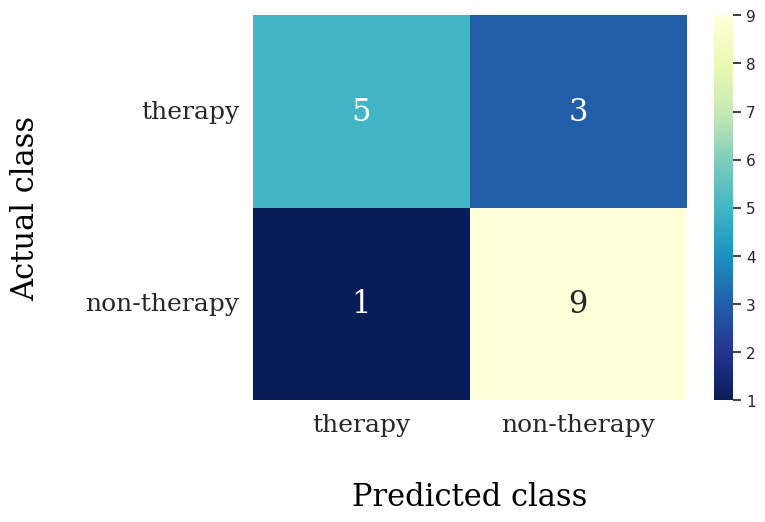

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

cm = np.array(confusion_matrix(y_test, y_pred))

font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal'}
# cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.set()
classes = np.array(['therapy','non-therapy'])
fig, ax = plt.subplots(figsize=(7, 5))
ax = sns.heatmap(cm, annot=True, fmt='.0f', cmap="YlGnBu_r", annot_kws={'family': 'serif', "size": 22}) #Blues,Oranges,Reds,YlGnBu
ax.set(xticklabels=classes, yticklabels=classes)
plt.setp(ax.get_yticklabels(), rotation=0, ha="right")
# ax.set_title(f'Confusion matrix of XGboost model',fontsize=32, fontdict=font, pad=25)
ax.set_ylabel('Actual class',fontsize=22, fontdict=font, labelpad=32)
ax.set_xlabel('Predicted class',fontsize=22, fontdict=font, labelpad=32)

hfont = {'fontname':'serif'}
plt.yticks(fontsize=18, **hfont)
plt.xticks(fontsize=18, **hfont)

## Mean fv- Normalization

In [ ]:
train = df_all[df_all['split'] =='train']
test = df_all[df_all['split'] !='train']
X_train = train.iloc[:, 0:24].to_numpy()
X_test = test.iloc[:, 0:24].to_numpy()
y_train = train.iloc[:, -3]
y_test = test.iloc[:, -3]

X_train_norm = np.linalg.norm(X_train)
X_train_norm = X_train/X_train_norm

X_test_norm = np.linalg.norm(X_test)
X_test_norm = X_test/X_test_norm

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix

#Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]
kernels = ['linear', 'rbf', 'poly']

svm= svm.SVC()
param_grid = {'gamma' : gammas, 'kernel' : kernels}
grid_search = GridSearchCV(svm, param_grid, cv=10)

SVM = grid_search.fit(X_train_norm, y_train)

# examine the first result
print("**examine the first result","\n")

print(SVM.cv_results_['params'][0])
print(SVM.cv_results_['mean_test_score'][0])

# print the array of mean scores only
print("\n","**print the array of mean scores only","\n")

grid_mean_scores = SVM.cv_results_['mean_test_score']
print(grid_mean_scores)

# examine the best model
print("\n","**examine the best model","\n")
bestS_ = SVM.best_params_
print(SVM.best_score_)
print(SVM.best_params_)
print(SVM.best_estimator_)

**examine the first result 

{'gamma': 0.001, 'kernel': 'linear'}
0.5619047619047619

 **print the array of mean scores only 

[0.56190476 0.56190476 0.56190476 0.56190476 0.56190476 0.56190476
 0.56190476 0.56190476 0.56190476 0.56190476 0.56190476 0.56190476]

 **examine the best model 

0.5619047619047619
{'gamma': 0.001, 'kernel': 'linear'}
SVC(gamma=0.001, kernel='linear')


In [ ]:
from sklearn import svm
svm= svm.SVC(random_state = 1, gamma = bestS_['gamma'], kernel = bestS_['kernel'])
modelOpt = svm.fit(X_train_norm, y_train)

y_pred = modelOpt.predict(X_test_norm)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.56      1.00      0.71        10
           1       0.00      0.00      0.00         8

    accuracy                           0.56        18
   macro avg       0.28      0.50      0.36        18
weighted avg       0.31      0.56      0.40        18

[[10  0]
 [ 8  0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(array([0.5, 1.5]), [Text(0.5, 0, 'non-therapy'), Text(1.5, 0, 'therapy')])

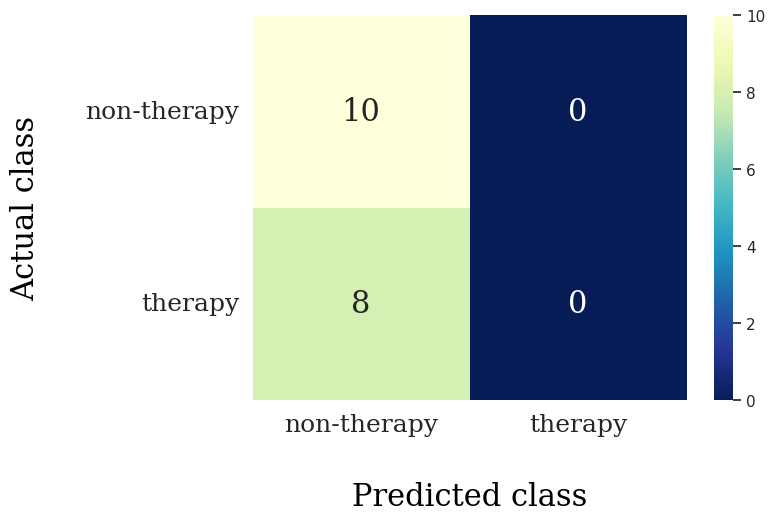

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

cm = np.array(confusion_matrix(y_test, y_pred))

font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal'}
# cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.set()
classes = np.array(['non-therapy','therapy'])
fig, ax = plt.subplots(figsize=(7, 5))
ax = sns.heatmap(cm, annot=True, fmt='.0f', cmap="YlGnBu_r", annot_kws={'family': 'serif', "size": 22}) #Blues,Oranges,Reds,YlGnBu
ax.set(xticklabels=classes, yticklabels=classes)
plt.setp(ax.get_yticklabels(), rotation=0, ha="right")
# ax.set_title(f'Confusion matrix of XGboost model',fontsize=32, fontdict=font, pad=25)
ax.set_ylabel('Actual class',fontsize=22, fontdict=font, labelpad=32)
ax.set_xlabel('Predicted class',fontsize=22, fontdict=font, labelpad=32)

hfont = {'fontname':'serif'}
plt.yticks(fontsize=18, **hfont)
plt.xticks(fontsize=18, **hfont)

# 5️⃣ ML //ANN Classifier

In [ ]:
#train = df_mean[df_mean['split'] =='train']
#test = df_mean[df_mean['split'] !='train']

In [41]:
import tensorflow.keras as keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import *
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np

###Mean fv

  1.3.1)  solver กำหนด ‘lbfgs’, ‘sgd’ และ ‘adam’
	1.3.2)  alpha  กำหนด 0.0001, 0.001, 0.01 และ 0.1
	1.3.3)  hidden_layer_sizes กำหนด 100, 300 และ 400


In [42]:
train = df_all[df_all['split'] =='train']
test = df_all[df_all['split'] !='train']
X_train = train.iloc[:, 0:24].to_numpy()
X_test = test.iloc[:, 0:24].to_numpy()
y_train = train.iloc[:, -3]
y_test = test.iloc[:, -3]

In [43]:
solver = ['lbfgs', 'sgd' , 'adam']
alpha = [1e-4, 1e-3, 1e-2, 1e-1]
hidden_layer_sizes = [100, 300, 400]

clf = MLPClassifier(random_state=1)
param_gridclf = {
    'solver': solver,
    'alpha': alpha,
    'hidden_layer_sizes': hidden_layer_sizes
}

grid_search = GridSearchCV(clf, param_gridclf, cv=10)

In [44]:
bestANN = grid_search.fit(X_train, y_train)
bestANN_ = bestANN.best_params_

ANNOpt = MLPClassifier(random_state=1, solver = bestANN_['solver'], alpha = bestANN_['alpha'], hidden_layer_sizes = bestANN_['hidden_layer_sizes'])
modelANNOpt = ANNOpt.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of i

In [45]:
print(bestANN_)

{'alpha': 0.01, 'hidden_layer_sizes': 400, 'solver': 'lbfgs'}


In [46]:
#results_df = pd.DataFrame(grid_search.cv_results_)[['params', 'mean_test_score', 'std_test_score']]
#print(results_df)

ตารางผล 10 fold

In [47]:
import pandas as pd
results_df_bestANN = pd.DataFrame(bestANN.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

# Display the DataFrame
print(results_df_bestANN)

    mean_test_score  std_test_score  \
0          0.611905        0.141682   
1          0.438095        0.061353   
2          0.438095        0.061353   
3          0.561905        0.061353   
4          0.388095        0.114211   
5          0.392857        0.129209   
6          0.671429        0.171296   
7          0.595238        0.098169   
8          0.504762        0.242296   
9          0.595238        0.098169   
10         0.438095        0.061353   
11         0.438095        0.061353   
12         0.561905        0.061353   
13         0.388095        0.114211   
14         0.392857        0.149166   
15         0.676190        0.217489   
16         0.623810        0.124994   
17         0.473810        0.235088   
18         0.611905        0.141682   
19         0.438095        0.061353   
20         0.438095        0.061353   
21         0.561905        0.061353   
22         0.357143        0.089087   
23         0.376190        0.124994   
24         0.690476      

In [ ]:
#import pandas as pd
#results_df = pd.DataFrame(SVM.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

# Display the DataFrame
#print(results_df)

In [48]:
y_predANN = ANNOpt.predict(X_test)

print(classification_report(y_test, y_predANN))
y_predANNRe = confusion_matrix(y_test, y_predANN)
print(y_predANNRe)

              precision    recall  f1-score   support

           0       0.71      0.62      0.67         8
           1       0.73      0.80      0.76        10

    accuracy                           0.72        18
   macro avg       0.72      0.71      0.71        18
weighted avg       0.72      0.72      0.72        18

[[5 3]
 [2 8]]


(array([0.5, 1.5]), [Text(0.5, 0, 'therapy'), Text(1.5, 0, 'non-therapy')])

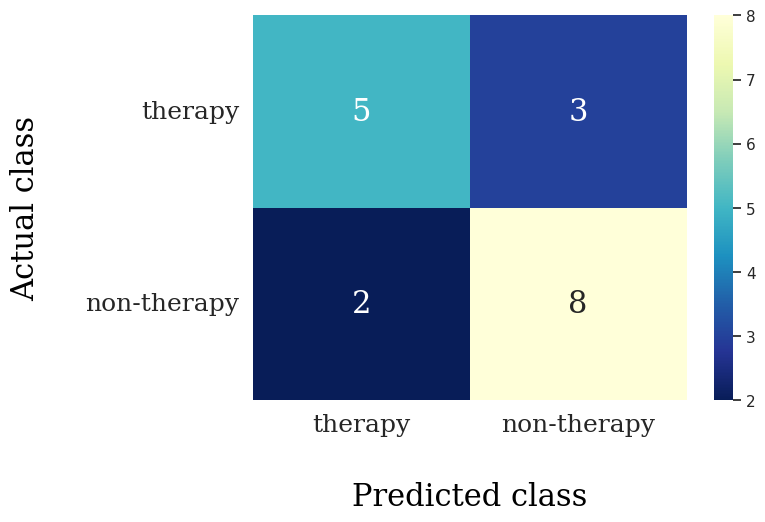

In [49]:
#plot Confusion matrix
import seaborn as sns

font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal'}
# cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.set()
classes = np.array(['therapy','non-therapy'])
fig, ax = plt.subplots(figsize=(7, 5))
ax = sns.heatmap(y_predANNRe, annot=True, fmt='.0f', cmap="YlGnBu_r", annot_kws={'family': 'serif', "size": 22}) #Blues,Oranges,Reds,YlGnBu
ax.set(xticklabels=classes, yticklabels=classes)
plt.setp(ax.get_yticklabels(), rotation=0, ha="right")
# ax.set_title(f'Confusion matrix of XGboost model',fontsize=32, fontdict=font, pad=25)
ax.set_ylabel('Actual class',fontsize=22, fontdict=font, labelpad=32)
ax.set_xlabel('Predicted class',fontsize=22, fontdict=font, labelpad=32)

hfont = {'fontname':'serif'}
plt.yticks(fontsize=18, **hfont)
plt.xticks(fontsize=18, **hfont)

###Mean fa-Normalization

In [ ]:
solver = ['lbfgs', 'sgd' , 'adam']
alpha = [1e-4, 1e-3, 1e-2, 1e-1]
hidden_layer_sizes = [100, 300, 400]

clfNor = MLPClassifier(random_state=1)
param_gridclfNor = {
    'solver': solver,
    'alpha': alpha,
    'hidden_layer_sizes': hidden_layer_sizes
}

grid_searchNor = GridSearchCV(clfNor, param_gridclfNor, cv=10)

bestANNNor = grid_searchNor.fit(X_train_norm, y_train)
bestANNNor_ = bestANNNor.best_params_

ANNNorOpt = MLPClassifier(random_state=1, solver = bestANNNor_['solver'], alpha = bestANNNor_['alpha'], hidden_layer_sizes = bestANNNor_['hidden_layer_sizes'])
modelANNNorOpt = ANNNorOpt.fit(X_train_norm, y_train)

print(bestANNNor_)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS R

{'alpha': 0.001, 'hidden_layer_sizes': 400, 'solver': 'lbfgs'}


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [ ]:
print(bestANNNor_)

{'alpha': 0.001, 'hidden_layer_sizes': 400, 'solver': 'lbfgs'}


In [ ]:
y_predANNNor = ANNNorOpt.predict(X_test)

print(classification_report(y_test, y_predANNNor))
y_predANNReNor = confusion_matrix(y_test, y_predANNNor)
print(y_predANNReNor)

              precision    recall  f1-score   support

           0       0.56      1.00      0.71        10
           1       0.00      0.00      0.00         8

    accuracy                           0.56        18
   macro avg       0.28      0.50      0.36        18
weighted avg       0.31      0.56      0.40        18

[[10  0]
 [ 8  0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(array([0.5, 1.5]), [Text(0.5, 0, 'non-therapy'), Text(1.5, 0, 'therapy')])

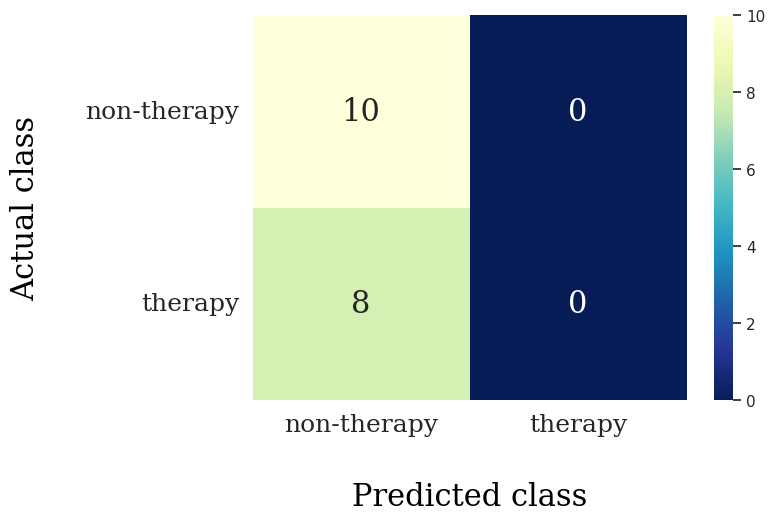

In [ ]:
#plot Confusion matrix
import seaborn as sns

font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal'}
# cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.set()
classes = np.array(['non-therapy','therapy'])
fig, ax = plt.subplots(figsize=(7, 5))
ax = sns.heatmap(y_predANNReNor, annot=True, fmt='.0f', cmap="YlGnBu_r", annot_kws={'family': 'serif', "size": 22}) #Blues,Oranges,Reds,YlGnBu
ax.set(xticklabels=classes, yticklabels=classes)
plt.setp(ax.get_yticklabels(), rotation=0, ha="right")
# ax.set_title(f'Confusion matrix of XGboost model',fontsize=32, fontdict=font, pad=25)
ax.set_ylabel('Actual class',fontsize=22, fontdict=font, labelpad=32)
ax.set_xlabel('Predicted class',fontsize=22, fontdict=font, labelpad=32)

hfont = {'fontname':'serif'}
plt.yticks(fontsize=18, **hfont)
plt.xticks(fontsize=18, **hfont)

# 6️⃣ ML // KNN Classifier

## Mean fv

1.1.1)	n_neighbors กำหนด 3, 5, 7 และ 9

1.1.2)	Weights กำหนด ‘uniform’และ ‘distance’


In [50]:
train = df_all[df_all['split'] =='train']
test = df_all[df_all['split'] !='train']
X_train = train.iloc[:, 0:24].to_numpy()
X_test = test.iloc[:, 0:24].to_numpy()
y_train = train.iloc[:, -3]
y_test = test.iloc[:, -3]

In [51]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

n_neighbors = [3, 5, 7, 9]
weights = ['uniform', 'distance']  # Corrected parameter name

knn = KNeighborsClassifier()
param_gridknn = {
    'n_neighbors': n_neighbors,
    'weights': weights  # Corrected parameter name
}

grid_search_knn = GridSearchCV(knn, param_gridknn, cv=10)

bestknn = grid_search_knn.fit(X_train, y_train)
bestknn_ = bestknn.best_params_

knnOpt = KNeighborsClassifier(n_neighbors=bestknn_['n_neighbors'], weights=bestknn_['weights'])  # Corrected parameter name
modelknnOpt = knnOpt.fit(X_train, y_train)

print(bestknn_)

{'n_neighbors': 5, 'weights': 'uniform'}


In [52]:

import pandas as pd
results_df_bestknn = pd.DataFrame(bestknn.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

# Display the DataFrame
print(results_df_bestknn)

   mean_test_score  std_test_score                                     params
0         0.602381        0.206210   {'n_neighbors': 3, 'weights': 'uniform'}
1         0.602381        0.206210  {'n_neighbors': 3, 'weights': 'distance'}
2         0.623810        0.107433   {'n_neighbors': 5, 'weights': 'uniform'}
3         0.588095        0.202885  {'n_neighbors': 5, 'weights': 'distance'}
4         0.592857        0.124381   {'n_neighbors': 7, 'weights': 'uniform'}
5         0.542857        0.174899  {'n_neighbors': 7, 'weights': 'distance'}
6         0.514286        0.136027   {'n_neighbors': 9, 'weights': 'uniform'}
7         0.545238        0.186095  {'n_neighbors': 9, 'weights': 'distance'}


In [53]:
y_predknn = modelknnOpt.predict(X_test)

#Marking the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test, y_predknn))

cmknn = (confusion_matrix(y_test, y_predknn))#performance
print(cmknn)

              precision    recall  f1-score   support

           0       0.62      0.62      0.62         8
           1       0.70      0.70      0.70        10

    accuracy                           0.67        18
   macro avg       0.66      0.66      0.66        18
weighted avg       0.67      0.67      0.67        18

[[5 3]
 [3 7]]


(array([0.5, 1.5]), [Text(0.5, 0, 'therapy'), Text(1.5, 0, 'non-therapy')])

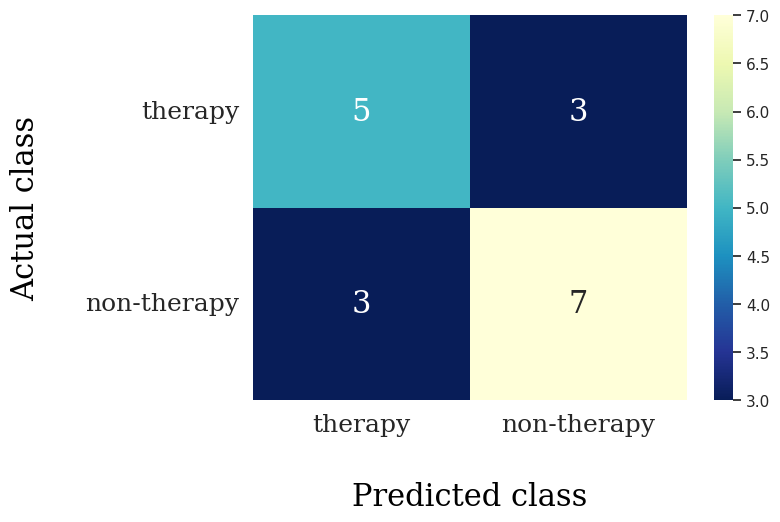

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

cm = np.array(confusion_matrix(y_test, y_pred))

font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal'}
# cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.set()
classes = np.array(['therapy','non-therapy'])
fig, ax = plt.subplots(figsize=(7, 5))
ax = sns.heatmap(cmknn, annot=True, fmt='.0f', cmap="YlGnBu_r", annot_kws={'family': 'serif', "size": 22}) #Blues,Oranges,Reds,YlGnBu
ax.set(xticklabels=classes, yticklabels=classes)
plt.setp(ax.get_yticklabels(), rotation=0, ha="right")
# ax.set_title(f'Confusion matrix of XGboost model',fontsize=32, fontdict=font, pad=25)
ax.set_ylabel('Actual class',fontsize=22, fontdict=font, labelpad=32)
ax.set_xlabel('Predicted class',fontsize=22, fontdict=font, labelpad=32)

hfont = {'fontname':'serif'}
plt.yticks(fontsize=18, **hfont)
plt.xticks(fontsize=18, **hfont)

## Mean fv- Normalization

In [55]:
train = df_all[df_all['split'] =='train']
test = df_all[df_all['split'] !='train']
X_train = train.iloc[:, 0:24].to_numpy()
X_test = test.iloc[:, 0:24].to_numpy()
y_train = train.iloc[:, -3]
y_test = test.iloc[:, -3]

X_train_norm = np.linalg.norm(X_train)
X_train_norm = X_train/X_train_norm

X_test_norm = np.linalg.norm(X_test)
X_test_norm = X_test/X_test_norm

In [56]:
n_neighbors = [3, 5, 7, 9]
weights = ['uniform', 'distance']  # Corrected parameter name

knnNor = KNeighborsClassifier()
param_gridknnNor = {
    'n_neighbors': n_neighbors,
    'weights': weights  # Corrected parameter name
}

grid_search_knnNor = GridSearchCV(knnNor, param_gridknnNor, cv=10)

bestknnNor = grid_search_knnNor.fit(X_train_norm, y_train)
bestknnNor_ = bestknnNor.best_params_

knnNorOpt = KNeighborsClassifier(n_neighbors=bestknnNor_['n_neighbors'], weights=bestknnNor_['weights'])  # Corrected parameter name
modelknnNorOpt = knnOpt.fit(X_train_norm, y_train)

print(bestknn_)

{'n_neighbors': 5, 'weights': 'uniform'}


In [57]:
y_predknnNor = modelknnNorOpt.predict(X_test)

#Marking the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test, y_predknnNor))

cmknnNor = (confusion_matrix(y_test, y_predknnNor))#performance
print(cmknnNor)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.56      1.00      0.71        10

    accuracy                           0.56        18
   macro avg       0.28      0.50      0.36        18
weighted avg       0.31      0.56      0.40        18

[[ 0  8]
 [ 0 10]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(array([0.5, 1.5]), [Text(0.5, 0, 'therapy'), Text(1.5, 0, 'non-therapy')])

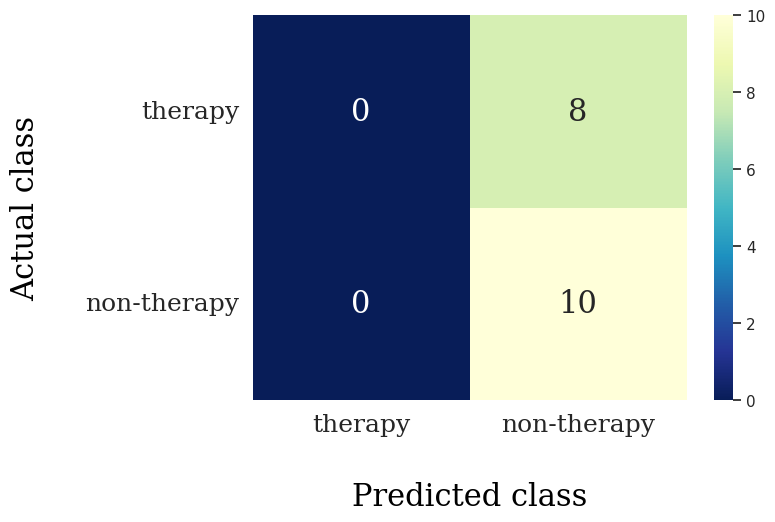

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

cm = np.array(confusion_matrix(y_test, y_pred))

font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal'}



sns.set()
classes = np.array(['therapy','non-therapy'])
fig, ax = plt.subplots(figsize=(7, 5))
ax = sns.heatmap(cmknnNor, annot=True, fmt='.0f', cmap="YlGnBu_r", annot_kws={'family': 'serif', "size": 22}) # Blues, Oranges, Reds, YlGnBu
ax.set(xticklabels=classes, yticklabels=classes)
plt.setp(ax.get_yticklabels(), rotation=0, ha="right")
# ax.set_title(f'Confusion matrix of XGboost model',fontsize=32, fontdict=font, pad=25)
ax.set_ylabel('Actual class',fontsize=22, fontdict=font, labelpad=32)
ax.set_xlabel('Predicted class',fontsize=22, fontdict=font, labelpad=32)

hfont = {'fontname':'serif'}
plt.yticks(fontsize=18, **hfont)
plt.xticks(fontsize=18, **hfont)